In [188]:
%matplotlib inline

import matplotlib.pyplot as plt
import pyart
import numpy as np
from scipy import ndimage, signal
import time

sweep  = 0
x_lims = [0, 20]
y_lims = [0, 5]
v_min  = -10
v_max  = 15
fig_sz = [10, 5]
c_lbl  = 'Velocity (m/s)'
p_data = 'velocity'
root_path = '/media/meso/DATA/phd/obs/radar/CP2/mdv/s_band/rhi/'
nyq       = 50

In [199]:
def plot_rhi(fn,subpl):
    # read file
    # filename = '/media/meso/DATA/phd/obs/radar/CP2/mdv/s_band/rhi/20141106/031202.mdv'
    radar = pyart.io.read_mdv(fn)
    display = pyart.graph.RadarDisplay(radar)
    # plot velocity
    ax = fig.add_subplot(subpl)
    
    gatefilter = pyart.correct.GateFilter(radar)
    gatefilter.exclude_below(p_data,v_min)
    gatefilter.exclude_above(p_data,v_max)
    corr_vel = pyart.correct.dealias_region_based(
    radar, vel_field='velocity', keep_original=False, 
    gatefilter = gatefilter, nyquist_vel=nyq, centered = True)
    radar.add_field('corrected_velocity', corr_vel, replace_existing = True)
    
    display.plot_rhi('corrected_velocity', sweep=sweep, 
                     vmin=v_min, vmax=v_max, fig=fig, ax=ax,
                     colorbar_flag=0, cmap = pyart.graph.cm.BuDRd12,
                     title = '', axislabels = ('',''))
    display.set_limits(xlim=x_lims, ylim=y_lims)
    
    ax.grid(color='k', linestyle='-', linewidth=0.5, which='major')

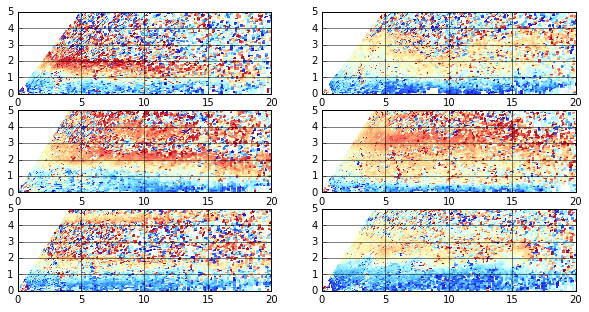

In [200]:
fig = plt.figure(figsize=fig_sz)

fn = '20141106/031202.mdv'
plot_rhi(root_path + fn,321)
fn = '20141127/050001.mdv'
plot_rhi(root_path + fn,322)
fn = '20141209/043002.mdv'
plot_rhi(root_path + fn,323)
fn = '20141217/053602.mdv'
plot_rhi(root_path + fn,324)
fn = '20141218/044202.mdv'
plot_rhi(root_path + fn,325)
fn = '20150119/030045.mdv'
plot_rhi(root_path + fn,326)